In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [4]:
data = pd.read_csv('200707hourly.txt', on_bad_lines='skip')


/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_5786/1971058314.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('200707hourly.txt', on_bad_lines='skip')


In [5]:
data.columns

Index(['Wban Number', ' YearMonthDay', ' Time', ' Station Type',
       ' Maintenance Indicator', ' Sky Conditions', ' Visibility',
       ' Weather Type', ' Dry Bulb Temp', ' Dew Point Temp', ' Wet Bulb Temp',
       ' % Relative Humidity', ' Wind Speed (kt)', ' Wind Direction',
       ' Wind Char. Gusts (kt)', ' Val for Wind Char.', ' Station Pressure',
       ' Pressure Tendency', ' Sea Level Pressure', ' Record Type',
       ' Precip. Total'],
      dtype='object')

In [6]:
columns_list = data.columns.tolist()

# To simply print the list of columns:
columns_list

['Wban Number',
 ' YearMonthDay',
 ' Time',
 ' Station Type',
 ' Maintenance Indicator',
 ' Sky Conditions',
 ' Visibility',
 ' Weather Type',
 ' Dry Bulb Temp',
 ' Dew Point Temp',
 ' Wet Bulb Temp',
 ' % Relative Humidity',
 ' Wind Speed (kt)',
 ' Wind Direction',
 ' Wind Char. Gusts (kt)',
 ' Val for Wind Char.',
 ' Station Pressure',
 ' Pressure Tendency',
 ' Sea Level Pressure',
 ' Record Type',
 ' Precip. Total']

In [8]:
wind_speed_dtype = data[' Wind Speed (kt)'].dtype
print(f'Data type of "Wind Speed (kt)": {wind_speed_dtype}')

# Optionally, check for non-numeric values
non_numeric = pd.to_numeric(data[' Wind Speed (kt)'], errors='coerce').isna().any()
print(f'Contains non-numeric values: {non_numeric}')

Data type of "Wind Speed (kt)": object
Contains non-numeric values: True


In [12]:
data['Wind Speed Numeric'] = pd.to_numeric(data[' Wind Speed (kt)'], errors='coerce')
non_numeric_rows = data[data['Wind Speed Numeric'].isna()]

# Display the non-numeric values
print(non_numeric_rows[[' Wind Speed (kt)']])

        Wind Speed (kt)
459                   -
550                   -
770                   -
1552                  -
6020                  -
...                 ...
782214                -
782216                -
785206                -
785216                -
785786                -

[5697 rows x 1 columns]


In [ ]:
data.isna().sum()

Wban Number                  0
 YearMonthDay                0
 Time                        0
 Station Type                0
 Maintenance Indicator       0
 Sky Conditions              0
 Visibility                  0
 Weather Type                0
 Dry Bulb Temp               0
 Dew Point Temp              0
 Wet Bulb Temp            2483
 % Relative Humidity         0
 Wind Speed (kt)             0
 Wind Direction              0
 Wind Char. Gusts (kt)       0
 Val for Wind Char.          0
 Station Pressure            0
 Pressure Tendency           0
 Sea Level Pressure          0
 Record Type                 0
 Precip. Total               0
dtype: int64

In [ ]:
data

,Wban Number,YearMonthDay,Time,Station Type,Maintenance Indicator,Sky Conditions,Visibility,Weather Type,Dry Bulb Temp,Dew Point Temp,...,% Relative Humidity,Wind Speed (kt),Wind Direction,Wind Char. Gusts (kt),Val for Wind Char.,Station Pressure,Pressure Tendency,Sea Level Pressure,Record Type,Precip. Total
0,3011,20070701,50,AO2,-,CLR,10SM,-,57,18,...,22,3,130,-,0,30.45,-,-,AA,-
1,3011,20070701,150,AO2,-,CLR,10SM,-,55,18,...,23,3,150,-,0,30.45,-,-,AA,-
2,3011,20070701,250,AO2,-,CLR,10SM,-,54,16,...,22,6,140,-,0,30.44,-,-,AA,-
3,3011,20070701,350,AO2,-,CLR,10SM,-,54,14,...,20,4,130,-,0,30.45,-,-,AA,-
4,3011,20070701,450,AO2,-,CLR,10SM,-,54,14,...,20,4,140,-,0,30.46,-,-,AA,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785799,96402,20070718,350,-,-,SCT040 BKN080 OVC110,10SM,-,-,-,...,-,0,000,-,0,29.80,-,-,AA,-
785800,96402,20070718,450,-,-,SCT040 BKN080 OVC110,10SM,-,-,-,...,-,0,000,-,0,29.79,-,-,AA,-
785801,96402,20070718,550,-,-,SCT040 BKN080 OVC110,10SM,-,-,-,...,-,0,000,-,0,29.79,-,-,AA,-
785802,96402,20070718,650,-,-,SCT040 BKN080 OVC110,10SM,-,-,-,...,-,0,000,-,0,29.77,-,-,AA,-


In [ ]:
data.describe()

,Wban Number,YearMonthDay,Time
count,785804.000000,7.858040e+05,785804.000000
mean,36786.456289,2.007071e+07,1178.066881
std,33186.547479,5.168954e+00,683.894080
min,3011.000000,2.007070e+07,10.000000
25%,12926.000000,2.007070e+07,555.000000
50%,23230.000000,2.007071e+07,1154.000000
75%,54789.000000,2.007071e+07,1753.000000
max,96402.000000,2.007072e+07,2359.000000


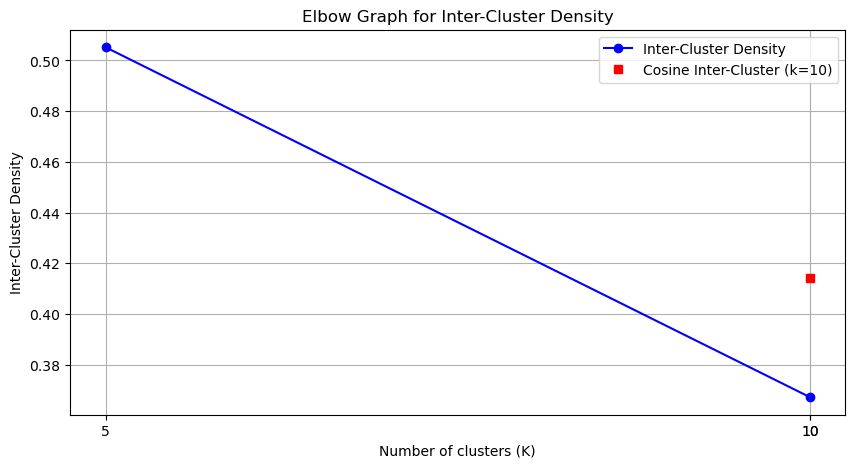

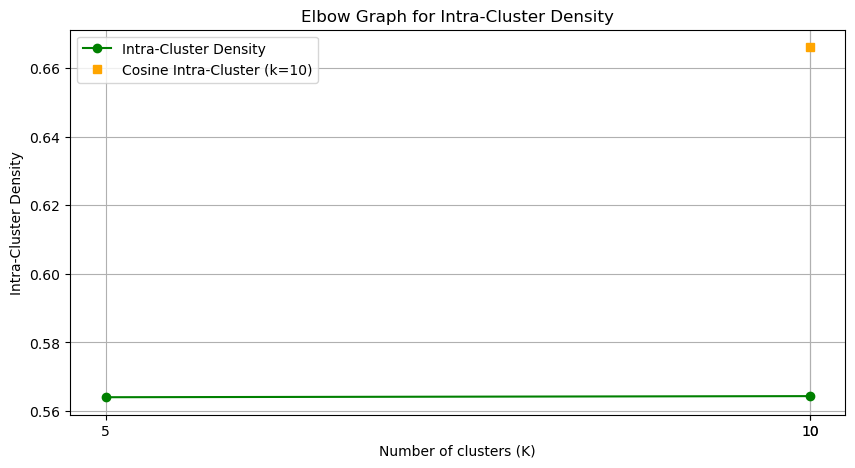

In [1]:
# Data from the user's clustering results
k_values = [5, 10]  # Assuming these are the k values used for Manhattan and Euclidean distances, and 10 for Kmeans
inter_cluster_densities = [0.5052167024866535, 0.3671243679212697]  # for Kmeans and Manhattan/Euclidean
intra_cluster_densities = [0.5640387657590269, 0.5643600814569034]  # for Kmeans and Manhattan/Euclidean

# Cosine distance results are for an unknown k-value
cosine_k_value = 10  # Assuming k=10 for cosine from the context
cosine_inter_cluster_density = 0.41435833538955114
cosine_intra_cluster_density = 0.6660760856365529

# Plotting the elbow graph for Inter-Cluster Density
plt.figure(figsize=(10, 5))
plt.plot(k_values, inter_cluster_densities, '-o', label='Inter-Cluster Density', color='blue')
plt.plot(cosine_k_value, cosine_inter_cluster_density, 's', label='Cosine Inter-Cluster (k=10)', color='red')

# Adding titles and labels
plt.title('Elbow Graph for Inter-Cluster Density')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inter-Cluster Density')
plt.xticks(k_values + [cosine_k_value])  # Including the cosine k-value in the axis
plt.legend()
plt.grid(True)
plt.show()

# Plotting the elbow graph for Intra-Cluster Density
plt.figure(figsize=(10, 5))
plt.plot(k_values, intra_cluster_densities, '-o', label='Intra-Cluster Density', color='green')
plt.plot(cosine_k_value, cosine_intra_cluster_density, 's', label='Cosine Intra-Cluster (k=10)', color='orange')

# Adding titles and labels
plt.title('Elbow Graph for Intra-Cluster Density')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Intra-Cluster Density')
plt.xticks(k_values + [cosine_k_value])  # Including the cosine k-value in the axis
plt.legend()
plt.grid(True)
plt.show()


In [1]:
# Python code to convert TSV file to CSV format

# Replace 'input_file_path' with the path to your input file
input_file_path = 'part-00000'
# Replace 'output_file_path' with the path where you want to save the CSV file
output_file_path = 'output.csv'

# Open the input file and read the lines
with open(input_file_path, 'r') as file:
    lines = file.readlines()

# Open the output file in write mode
with open(output_file_path, 'w') as csv_file:
    # Optionally write the headers, if you know them
    csv_file.write('Header1,Header2,Header3,...\n')  # Replace with your actual headers

    # Process each line from the input file
    for line in lines:
        line = line.strip()  # Remove any leading/trailing whitespace
        csv_line = line.replace('\t', ',')  # Replace tabs with commas
        csv_file.write(csv_line + '\n')  # Write the CSV-formatted line to the output file


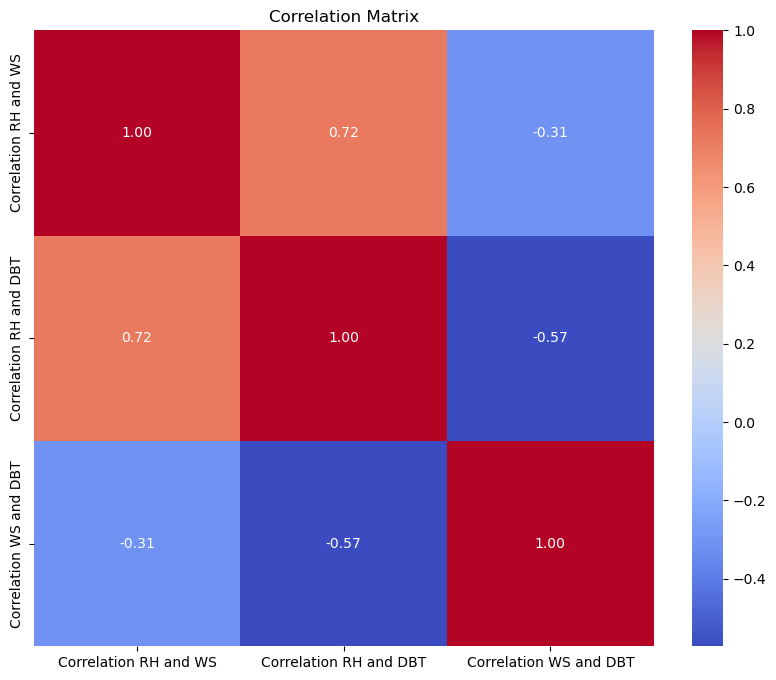

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data from the user's correlation results
data = {
    'Correlation RH and WS': [
        -0.166386323, -0.168006034, -0.170774145, -0.130372868, -0.140032209,
        -0.197917167, -0.208671147, -0.163721752, -0.168388479, -0.111228864,
        -0.129571702, -0.19881657, -0.206620103, -0.153491086, -0.185115903,
        -0.210607436, -0.192886429, -0.158870133, -0.090565128
    ],
    'Correlation RH and DBT': [
        0.6126492093831369, 0.6217832242877797, 0.6316600826723565, 0.6810410763988378,
        0.6917319327461712, 0.6314202307509842, 0.5849786642778098, 0.6316146871759112,
        0.6812511648467756, 0.7210120698188767, 0.722947163, 0.6050037834367099,
        0.612778789, 0.629277126, 0.6343925648147245, 0.6171669660083516,
        0.736544691, 0.7840953762394797, 0.9295436692179059
    ],
    'Correlation WS and DBT': [
        0.1024520657364338, 0.082021245, 0.029201834, 0.068620177, 0.061365681,
        0.09143895, 0.14118903373536498, 0.1682678336037442, 0.039015676, 0.0635959,
        0.075695757, 0.070545156, 0.092035494, 0.12906198421633197, 0.065847085,
        0.045522560891902146, 0.048879589, 0.078727897, -0.002676403
    ]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title('Correlation Matrix')
plt.show()
